Shape: (43800, 6)
Columns: Index(['Site', 'Species', 'ReadingDateTime', 'Value', 'Units',
       'Provisional or Ratified'],
      dtype='object')
First 5 rows:
  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R
Last 5 rows:
      Site Species   ReadingDateTime  Value   Units Provisional or Ratified
43795  CT3   PM2.5  31/12/2017 19:00   -2.0  ug m-3                       R
43796  CT3   PM2.5  31/12/2017 20:00    6.0  ug m-3                       R
43797  CT3   PM2.5  31/12/2017 21:00    5.0  ug m-3                       R
43798  CT3   PM2.5  31/12/2017 22:00    5.0  ug m-3                       R
43799  CT3   P

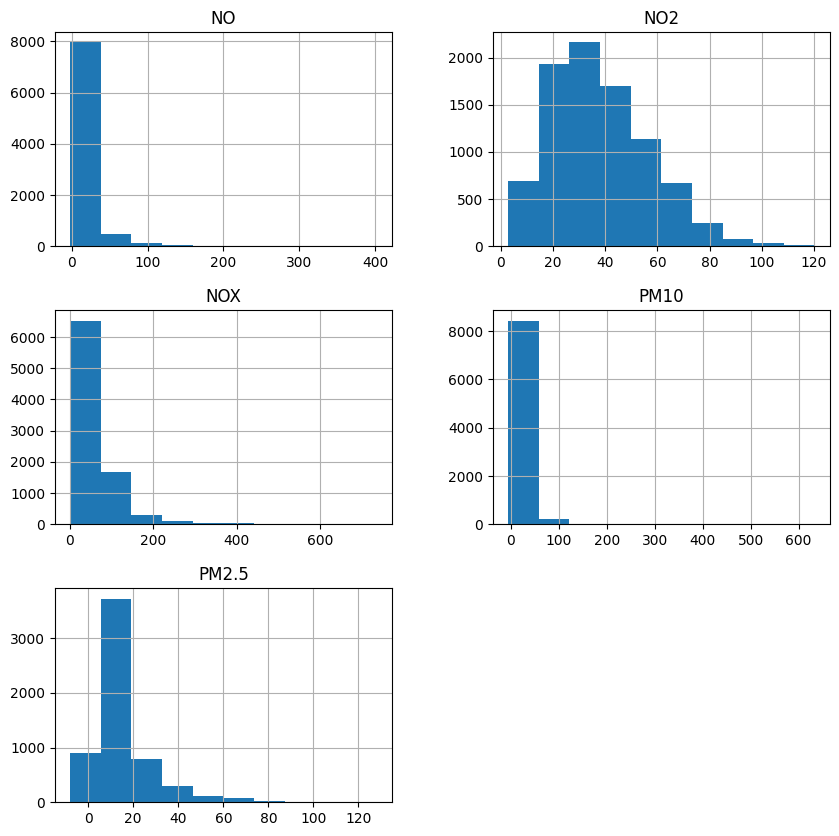

             Date   Time
0      01/01/2017  00:00
1      01/01/2017  01:00
2      01/01/2017  02:00
3      01/01/2017  03:00
4      01/01/2017  04:00
...           ...    ...
43795  31/12/2017  19:00
43796  31/12/2017  20:00
43797  31/12/2017  21:00
43798  31/12/2017  22:00
43799  31/12/2017  23:00

[43800 rows x 2 columns]
      Day Month  Year
0      01    01  2017
1      01    01  2017
2      01    01  2017
3      01    01  2017
4      01    01  2017
...    ..   ...   ...
43795  31    12  2017
43796  31    12  2017
43797  31    12  2017
43798  31    12  2017
43799  31    12  2017

[43800 rows x 3 columns]
                         Value   Units
Month Day Time  Species               
01    01  00:00 NO         3.5  ug m-3
          01:00 NO         3.6  ug m-3
          02:00 NO         2.2  ug m-3
          03:00 NO         2.1  ug m-3
          04:00 NO         3.3  ug m-3
Unstacked dataframe:
                Value                           Units                         \
Species   

In [2]:
# Importación de las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo y explorar el dataframe
file_path = r'C:\Users\PPC\Downloads\LaqnData.csv'  # Asegúrate de que este archivo esté en la ruta correcta
air_df = pd.read_csv(file_path)

# Explorar la estructura y contenido del dataframe
print(f"Shape: {air_df.shape}")
print(f"Columns: {air_df.columns}")
print(f"First 5 rows:\n{air_df.head()}")
print(f"Last 5 rows:\n{air_df.tail()}")
print(f"Data types:\n{air_df.dtypes}")
print(f"Missing values:\n{air_df.isna().sum()}")

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (air_df.isna().sum() / len(air_df)) * 100
print(f"Missing values percentage:\n{missing_percentage}")

# Paso 2: Cantidad de valores únicos por columna
unique_values = air_df.nunique()
print(f"Unique values per column:\n{unique_values}")

# Eliminar columnas que no agregan valor informativo (con un único valor)
for col in air_df.columns:
    if air_df[col].nunique() == 1:
        print(f"Eliminating column: {col}")
        air_df = air_df.drop(columns=[col])

# Verificar la columna 'Units' y eliminarla si tiene un único valor
if air_df['Units'].nunique() == 1:
    print("Eliminating column: Units")
    air_df = air_df.drop(columns=['Units'])

# Paso 3: Conteo de valores por categoría en la columna 'Species'
species_counts = air_df['Species'].value_counts()
print(f"Species value counts:\n{species_counts}")

# Paso 4: Promedio del valor por contaminante
mean_values = air_df.groupby('Species')['Value'].mean()
print(f"Mean values per species:\n{mean_values}")

# Paso 5: Convertir el formato de los datos a formato ancho
pvt_df = air_df.pivot(index='ReadingDateTime', columns='Species', values='Value')
print(f"Pivoted dataframe (first 5 rows):\n{pvt_df.head()}")

# Paso 6: Estadísticas descriptivas y preguntas específicas
desc_stats = pvt_df.describe()
print(f"Descriptive statistics:\n{desc_stats}")

# Mayor valor de NO2 y el día en que ocurrió
max_no2 = pvt_df['NO2'].idxmax()
print(f"Maximum NO2 value: {pvt_df['NO2'].max()} on {max_no2}")

# Menor valor de PM10 y el día en que ocurrió
min_pm10 = pvt_df['PM10'].idxmin()
print(f"Minimum PM10 value: {pvt_df['PM10'].min()} on {min_pm10}")

# Mediana del NO
median_no = pvt_df['NO'].median()
print(f"Median of NO: {median_no}")

# Primer cuartil de PM2.5
q1_pm25 = pvt_df['PM2.5'].quantile(0.25)
print(f"First quartile of PM2.5: {q1_pm25}")

# Paso 7: Dibujar histogramas para cada columna
pvt_df.hist(figsize=(10, 10))
plt.show()

# Paso 8: Fragmentación de la columna 'ReadingDateTime'
datetime_df = air_df.ReadingDateTime.str.split(' ', expand=True)
datetime_df.columns = ['Date', 'Time']
print(datetime_df)

date_df = datetime_df['Date'].str.split('/', expand=True)
date_df.columns = ['Day', 'Month', 'Year']
print(date_df)

# Unir las columnas con el dataframe original
air_df = air_df.join(date_df).join(datetime_df['Time']).drop(columns=['ReadingDateTime', 'Year'])
air_df = air_df.set_index(['Month', 'Day', 'Time', 'Species'])
print(air_df.head())

# Paso 9: Comparar con unstack
unstack_df = air_df.unstack()
print(f"Unstacked dataframe:\n{unstack_df.head()}")

# Paso 10: Comparación entre melt() y stack()
# Explicación de melt() vs stack()
melt_vs_stack = """
Ambas funciones transforman el formato de los datos.
.melt() convierte un formato ancho en uno largo, mientras que .stack() agrupa columnas bajo un índice jerárquico.
La contraparte más cercana a .melt() sería .stack(), ya que ambas permiten reorganizar los datos, aunque .stack() genera un MultiIndex.
"""
print(melt_vs_stack)
